using RNN, LSTM, GRU , BI 


In [2]:
import loading
from keras.models import Sequential
from keras.layers import Dense, Embedding,GRU,LSTM
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from numpy import array


/Users/xabuka/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
max_features = 10000
max_len = 100
training_samples = 11759  # We will be training on 200 samples
validation_samples = 2000  # We will be validating on 10000 samples

#keras model
epochs = 100
batch_size=128

#data directory
data_dir = '../data/SplitedPalSent'#labr5
saved_model = 'pre_trained_aravec_model.h5'

In [4]:
input_train, y_train = loading.load_train(data_dir,max_len,training_samples,validation_samples,max_features, Validation = False )
input_test, y_test = loading.load_test(data_dir,max_len,max_features)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Found 4276 unique tokens.
Shape of data tensor: (929, 100)
Shape of label tensor: (929,)
input_train shape: (929, 100)
input_test shape: (259, 100)


In [5]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length= max_len))
model.add(LSTM(32)) #GRU
#bidirectional 
#model.add(layers.Bidirectional(layers.LSTM(32)))
#model.add(layers.Bidirectional(
#    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
#model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 652,515
Trainable params: 652,515
Non-trainable params: 0
_________________________________________________________________


In [6]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])


In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(input_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    #validation_data=(x_val, y_val),callbacks=[early_stopping])
                    validation_split=0.2)



Train on 743 samples, validate on 186 samples
Epoch 1/1
743/743 [==============================] - 2s 2ms/step - loss: 1.0937 - acc: 0.4495 - val_loss: 1.0880 - val_acc: 0.4516


Plot

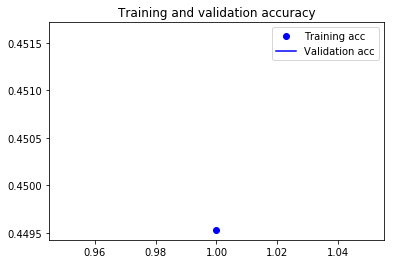

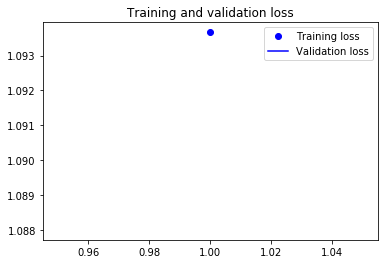

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Evaluation

In [11]:
scores= model.evaluate(input_test, y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#yhat = model.predict_classes(input_test, verbose = 2, batch_size = batch_size)
yhat = model.predict(input_test, verbose = 2, batch_size = batch_size)

#yhat = array(loading.one_encode_pred(yhat))
#n_values = 3 
#c = np.eye(n_values, dtype=int)[np.argmax(yhat, axis=1)]
#yhat = to_categorical(yhat, num_classes=3)
#print(yhat)

print(metrics.classification_report(y_test[:,:], np.round(yhat[:,:])))
#print(np.round(yhat[:,:]))
#for x,y in zip(y_test[:,:],yhat[:,:]):
#    print(x,y)

conf_mat = metrics.confusion_matrix(y_test.argmax(axis=1), yhat.argmax(axis=1))
print(conf_mat)


Accuracy: 32.82%
              precision    recall  f1-score   support

           0       0.33      1.00      0.49        85
           1       0.58      1.00      0.73       150
           2       0.00      0.00      0.00        24

   micro avg       0.45      0.91      0.60       259
   macro avg       0.30      0.67      0.41       259
weighted avg       0.44      0.91      0.59       259
 samples avg       0.45      0.91      0.60       259

[[ 85   0   0]
 [150   0   0]
 [ 24   0   0]]


/Users/xabuka/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
